<a href="https://colab.research.google.com/github/Mohamed-Diagne/VAR-SVAR-on-Optimized-Portfolio/blob/main/Risk_Management_VAR_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Quantifying Risk: VaR & ES Methods**
-------


Following the 2008 financial crisis, regulatory frameworks like **Basel III** reinforced the use of the **99% Value at Risk (VaR)** as a standard risk measure, while introducing complementary tools such as *stressed VaR* and mandatory stress testing. However, due to VaR’s inability to capture extreme tail risks, **Basel IV** reforms have moved toward replacing it with the **97.5% Conditional Value at Risk (CVaR)**, offering a more robust and conservative assessment of market risk. This regulatory shift reflects a broader effort to strengthen financial resilience and avoid underestimating systemic vulnerabilities.

To explore the practical implications of these risk measures, a portfolio consisting of two market assets valued at **10,000€** is constructed, with daily risk assessed over one year under different **VaR** and **ES** methodologies.




# Investment portfolio

**Choice of Stocks**

Microsoft is a highly profitable tech company, offering strong growth exposure. Canadian National Railway (CNR) operates in the stable transport sector, less affected by economic cycles. These two stocks have low correlation due to their different industries. Combining them helps reduce overall portfolio risk, making them ideal for a Value at Risk (VaR) analysis.

In [ ]:
import yfinance as yf

# Download data for Microsoft Corporation (MSFT)
MSF = yf.download(" MSFT", start="2023-01-01", end="2024-01-01")

# Download data for Canadian National Railway Company (CNR)
CNR = yf.download("CNR", start="2023-01-01", end="2024-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Calcul of Log-Returns**

\begin{equation}
    r_t = \ln \left( \frac{P_t}{P_{t-1}} \right) = \ln P_t - \ln P_{t-1}.
\end{equation}
where $P_t$ is the closing price at time $t$.

The logarithmic return is preferred because it is additive over multiple periods, simplifying aggregation and risk analysis (Alexander, 2008). Moreover, when working with daily data, it can be viewed as a discrete approximation of continuous time, enhancing volatility estimation, and mitigating the biases associated with arithmetic returns.

In [ ]:
import numpy as np

# Calculate logarithmic returns for Microsoft Corporation (MSF.F)
MSF['Log_Return'] = np.log(MSF['Close'] / MSF['Close'].shift(1))

# Calculate logarithmic returns for Canadian National Railway Company (CNR.TO)
CNR['Log_Return'] = np.log(CNR['Close'] / CNR['Close'].shift(1))

Correlation between Log Returns of Microsoft (MSF.F) and Canadian National Railway (CNR.TO): 0.08708817016309044


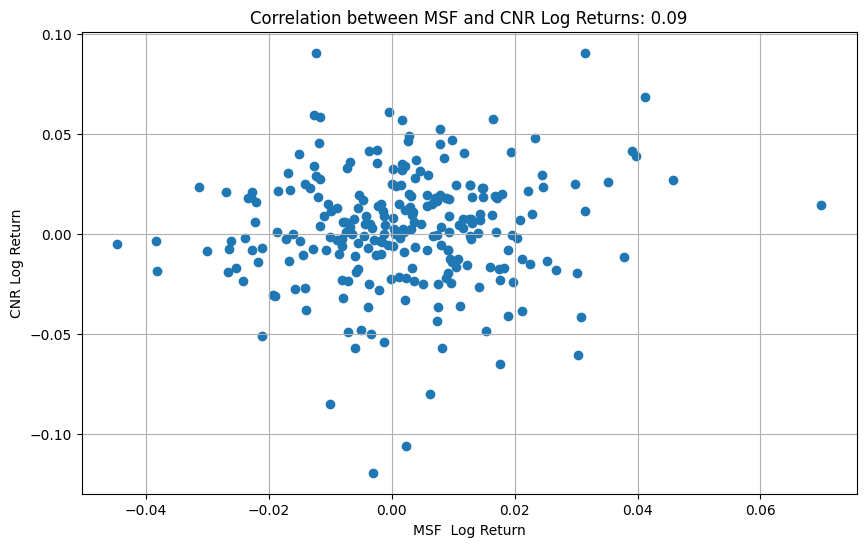

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Align the dates for both dataframes
msf_cnr = MSF.merge(CNR, left_index=True, right_index=True, suffixes=('_msf', '_cnr'))

# Calculate the correlation between the log returns
correlation = msf_cnr['Log_Return_msf'].corr(msf_cnr['Log_Return_cnr'])

print(f"Correlation between Log Returns of Microsoft (MSF.F) and Canadian National Railway (CNR.TO): {correlation}")

# Plot the correlation
plt.figure(figsize=(10, 6))
plt.scatter(msf_cnr['Log_Return_msf'], msf_cnr['Log_Return_cnr'])
plt.xlabel("MSF  Log Return")
plt.ylabel("CNR Log Return")
plt.title(f"Correlation between MSF and CNR Log Returns: {correlation:.2f}")
plt.grid(True)
plt.show()

The correlation between the two assets is 0.09, indicating a very low linear relationship between their returns, which is beneficial for portfolio diversification.

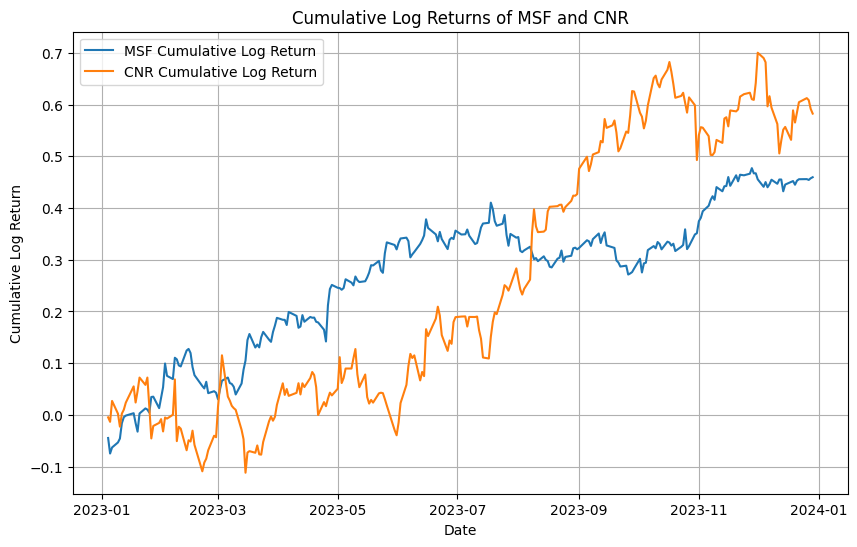

In [ ]:
# Calculate the cumulative log returns
msf_cnr['Cumulative_Log_Return_msf'] = msf_cnr['Log_Return_msf'].cumsum()
msf_cnr['Cumulative_Log_Return_cnr'] = msf_cnr['Log_Return_cnr'].cumsum()

# Plot the cumulative log returns
plt.figure(figsize=(10, 6))
plt.plot(msf_cnr['Cumulative_Log_Return_msf'], label='MSF Cumulative Log Return')
plt.plot(msf_cnr['Cumulative_Log_Return_cnr'], label='CNR Cumulative Log Return')
plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.title("Cumulative Log Returns of MSF and CNR")
plt.legend()
plt.grid(True)
plt.show()

**Choice of ponderation**

For this portfolio, we chose the **inverse volatility weighting method**. This approach allocates a higher weight to the **less volatile asset**, which helps reduce the overall portfolio risk. Compared to equal weighting, it provides a more risk-adjusted allocation by accounting for the individual risk of each asset.

The formula used is:

$$
w_i = \frac{\frac{1}{\sigma_i}}{\sum_{j=1}^{n} \frac{1}{\sigma_j}}
$$

Where:

- $w_i$ is the weight of asset $i$,  
- $\sigma_i$ is the standard deviation (volatility) of asset $i$,  
- $n$ is the total number of assets.

This method resulted in a **lower portfolio volatility** and a **more stable performance**, making it more suitable for risk-sensitive strategies in this analysis.



In [ ]:
import pandas as pd

# Merge the two log return series into one DataFrame
returns_df = pd.DataFrame({
    'MSF': MSF['Log_Return'],
    'CNR': CNR['Log_Return']
}).dropna()

# Calculate standard deviations (volatility)
vol_msf = returns_df['MSF'].std()
vol_cnr = returns_df['CNR'].std()

# Inverse volatility weights
inv_vol_msf = 1 / vol_msf
inv_vol_cnr = 1 / vol_cnr
sum_inv_vol = inv_vol_msf + inv_vol_cnr

w_msf = inv_vol_msf / sum_inv_vol
w_cnr = inv_vol_cnr / sum_inv_vol

# Add portfolio returns based on inverse volatility weights
returns_df['Portfolio_Return'] = returns_df['MSF'] * w_msf + returns_df['CNR'] * w_cnr

# Display weights and preview
print(f"Weight MSF: {w_msf:.2%}, Weight CNR: {w_cnr:.2%}")
returns_df.head()


Weight MSF: 64.79%, Weight CNR: 35.21%


,MSF,CNR,Portfolio_Return
Date,,,
2023-01-04,-0.044729,-0.004814,-0.030675
2023-01-05,-0.030086,-0.008653,-0.022539
2023-01-06,0.011716,0.040370,0.021805
2023-01-09,0.009689,-0.024505,-0.002351
2023-01-10,0.007588,-0.025120,-0.003928


The inverse volatility weighting approach resulted in a portfolio allocation of 64.79% to MSF and 35.21% to CNR, favoring the less volatile asset (MSF) to minimize overall portfolio risk.

**Descriptive Statistics**

In [ ]:
# Number of trading days in a year
trading_days = 252

# Calculate mean daily return and daily volatility of the portfolio
mean_daily_return = returns_df['Portfolio_Return'].mean()
vol_daily = returns_df['Portfolio_Return'].std()

# Annualize the return and volatility
annual_return = mean_daily_return * trading_days
annual_volatility = vol_daily * np.sqrt(trading_days)

# Display results
print(f"Mean Daily Return: {mean_daily_return:.2%}")
print(f"Annualized Return: {annual_return:.2%}")
print(f"Daily Volatility: {vol_daily:.2%}")
print(f"Annualized Volatility: {annual_volatility:.2%}")

Mean Daily Return: 0.20%
Annualized Return: 50.90%
Daily Volatility: 1.51%
Annualized Volatility: 23.89%


The portfolio shows a strong performance with an annualized return of 50.90%, significantly outpacing its annualized volatility of 23.89%, indicating an attractive risk-return profile.









**Cumulative portfolio return**

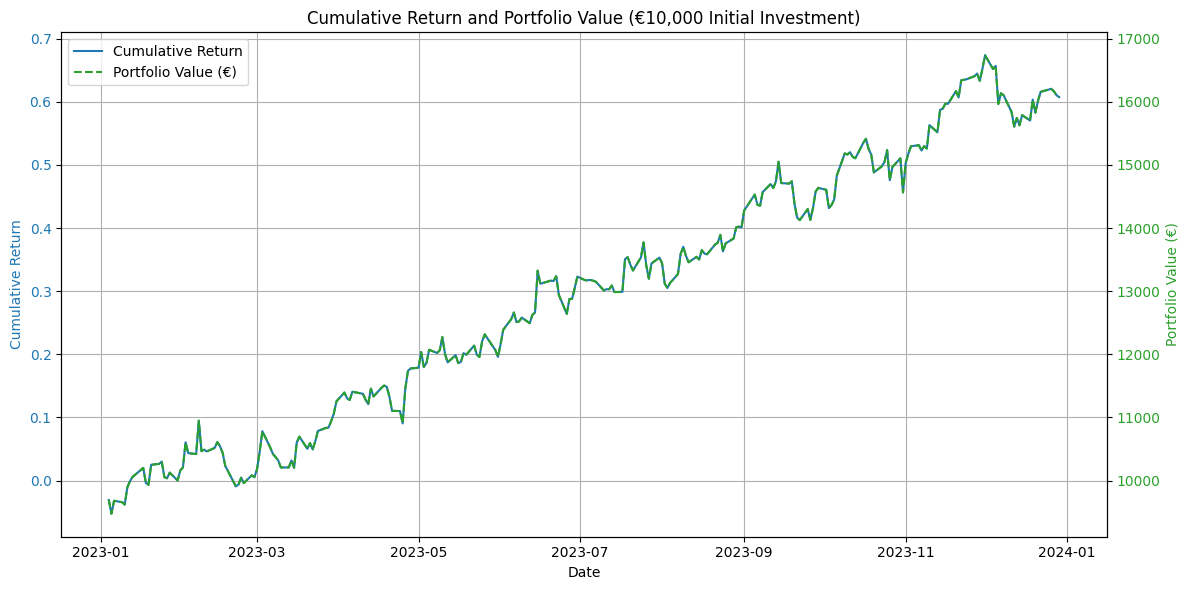

In [ ]:
# Calculate portfolio value (assuming an initial investment of 10,000€)
initial_investment = 10000
# Calculate the cumulative portfolio return
returns_df['Cumulative_Portfolio_Return'] = (1 + returns_df['Portfolio_Return']).cumprod() - 1
returns_df['Portfolio_Value'] = initial_investment * (1 + returns_df['Cumulative_Portfolio_Return'])

# Create a plot with two axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (left): cumulative return
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return', color=color)
ax1.plot(returns_df.index, returns_df['Cumulative_Portfolio_Return'], color=color, label='Cumulative Return')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Second axis (right): portfolio value in euros
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Portfolio Value (€)', color=color)
ax2.plot(returns_df.index, returns_df['Portfolio_Value'], color=color, linestyle='--', label='Portfolio Value (€)')
ax2.tick_params(axis='y', labelcolor=color)

# Add a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title and layout
plt.title('Cumulative Return and Portfolio Value (€10,000 Initial Investment)')
fig.tight_layout()
plt.show()

The chart shows a steadily increasing cumulative return and portfolio value, highlighting the strong performance and consistent growth of the inverse volatility weighted portfolio over the year.


<br>

# Value at Risk

**Value at Risk (VaR)** is a measure of **market risk** that estimates the maximum potential loss of a portfolio over a given time period at a certain confidence level, assuming normal market conditions. There are several methodologies to compute VaR, including **parametric**, **non-parametric**, and **hybrid** approaches.


## SMA (Parametric approach)  

The **SMA-based parametric VaR method** estimates market risk by assuming normally distributed returns and using a **simple moving average (SMA)** to calculate volatility. It is a fast and widely used approach in risk management.

The sample variance formula is:

$$
\sigma^2 = \frac{1}{n - 1} \sum_{t=1}^{n} (r_t - \bar{r})^2
$$

Where:
- $\bar{r}$ is the mean return,
- $n$ is the number of return observations.

The Value at Risk is then computed as:

$$
\text{VaR}_\alpha = \mu + z_\alpha \cdot \sigma
$$

Where:
- $\mu$ is the mean return (often assumed to be 0),
- $z_\alpha$ is the critical value at confidence level $\alpha$,
- $\sigma$ is the standard deviation of returns (SMA-based).



**Justification for Setting u=0 in VaR Calculation**

In the calculation of VaR, we set **mu = 0** because, over short periods such as **daily returns**, the **average trend** of the price is often negligible (close to 0) compared to the **fluctuations**. What matters for VaR is **volatility**, as it captures the **extreme potential losses** due to **price movements**. Moreover, in an **efficient market**, returns tend to **cancel out** over the long term, further justifying the focus on **volatility** rather than the average return.



In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

def calculate_parametric_var(returns, confidence_level=0.99, portfolio_value=10000, horizon_days=1):
    """
    Calculate parametric VaR and plot it on a histogram of portfolio losses in € (left-skewed).

    Parameters:
        returns (array-like): Daily returns of the asset or portfolio.
        confidence_level (float): Confidence level (e.g., 0.95).
        portfolio_value (float): Value of the portfolio in euros.
        horizon_days (int): Time horizon in days.

    Returns:
        None
    """
    # Z-score
    z_score = norm.ppf(confidence_level)

    # Volatility
    sigma_daily = np.std(returns, ddof=1)
    sigma_horizon = sigma_daily * np.sqrt(horizon_days)

    # VaR calculation
    # Note: We're using the simplified VaR formula that assumes μ = 0 (zero mean)
    # This is standard practice for short-term VaR (1-day) in banking for three reasons:
    # 1. For short horizons, volatility dominates the mean effect
    # 2. It provides a more conservative risk estimate
    # 3. Mean estimation is statistically less stable than volatility estimation
    #
    # The full formula would be: var_percent = -mean_return + z_score * sigma_horizon
    var_percent = z_score * sigma_horizon
    var_value = var_percent * portfolio_value

    # Losses in €
    losses = returns * -portfolio_value  # losses are negative when returns are negative

    # Print
    print(f"Confidence Level: {confidence_level:.0%}")
    print(f"Time Horizon: {horizon_days} day(s)")
    print(f"Portfolio Value: €{portfolio_value:,.2f}")
    print(f"Daily Volatility (SMA-based): {sigma_daily:.2%}")
    print(f"VaR: -{var_percent:.2%} → €{-var_value:,.2f}")

    # Plot histogram of losses (left-skewed)
    plt.figure(figsize=(10, 5))
    plt.hist(losses, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(-var_value, color='red', linestyle='--', linewidth=2,
                label=f'VaR €{-var_value:,.2f} ({confidence_level:.0%})')
    plt.title('Histogram of Portfolio Losses (Parametric VaR)')
    plt.xlabel('Portfolio Loss (€)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return var_percent, var_value


Confidence Level: 99%
Time Horizon: 1 day(s)
Portfolio Value: €10,000.00
Daily Volatility (SMA-based): 1.51%
VaR: -3.50% → €-350.12


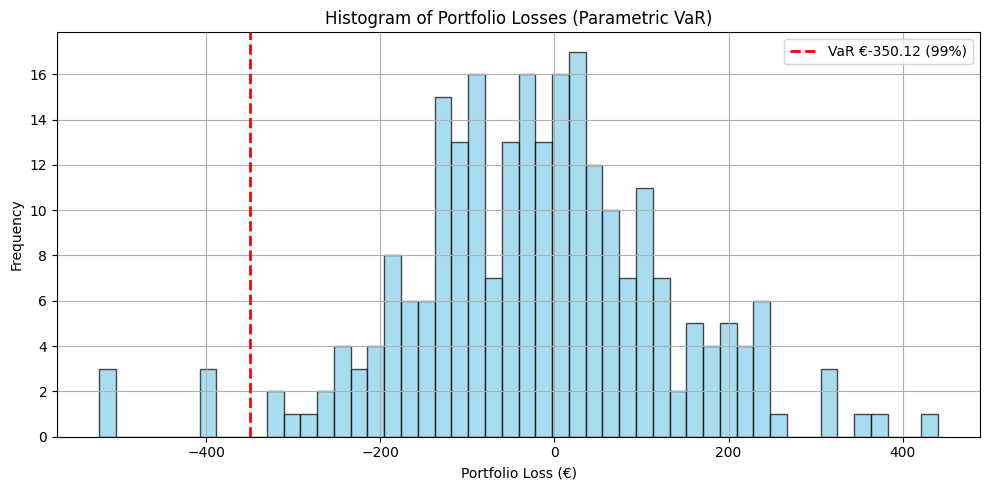

In [ ]:
var_parametric_pct, var_parametric_eur = calculate_parametric_var(
    returns_df['Portfolio_Return'],
    confidence_level=0.99,
    portfolio_value=10000
)

The 1-day 99% Value at Risk indicates that there is only a 1% chance the portfolio will lose more than €350.12, or 3.50% of its value, in a single day under normal market conditions.

<br>

## EWNA (Parametric approach)

The EWMA method gives **more weight to recent returns**, making it more responsive to market changes. It uses a **decay factor** $\lambda$ to exponentially reduce the impact of older observations.

The variance is calculated as:

$$
\sigma_t^2 = \sum_{i=1}^{n} (1 - \lambda) \cdot \lambda^{i-1} \cdot r_i^2
$$

Where:
- $\lambda$ is the smoothing parameter (commonly set to **0.94**),
- $r_i$ is the return at time $i$.

The **higher** the $\lambda$, the **slower** the decay of past data; a **lower** $\lambda$ gives more weight to recent volatility.

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

def calculate_ewma_var(returns, confidence_level=0.95, portfolio_value=10000, horizon_days=1, lambda_=0.94):
    """
    Calculate parametric VaR using EWMA volatility and plot it on a histogram of portfolio losses in €.

    Parameters:
        returns (array-like): Daily returns of the asset or portfolio.
        confidence_level (float): Confidence level (e.g., 0.95).
        portfolio_value (float): Portfolio value in monetary units.
        horizon_days (int): Time horizon in days (default is 1).
        lambda_ (float): Decay factor for EWMA (commonly 0.94).

    Returns:
        var_percent (float): Value at Risk as a percentage.
        var_value (float): Value at Risk in euros.
    """
    returns = np.array(returns)

    # Compute EWMA variance
    ewma_variance = 0
    for i in range(len(returns)):
        weight = (1 - lambda_) * (lambda_ ** i)
        ewma_variance += weight * returns[-(i + 1)]**2

    sigma_ewma = np.sqrt(ewma_variance)
    sigma_horizon = sigma_ewma * np.sqrt(horizon_days)

    # Compute VaR
    z_score = norm.ppf(confidence_level)
    var_percent = z_score * sigma_horizon
    var_value = var_percent * portfolio_value

    # Convert returns to monetary losses
    losses = -returns * portfolio_value

    # Print results
    print(f"Confidence Level: {confidence_level:.0%}")
    print(f"Time Horizon: {horizon_days} day(s)")
    print(f"Portfolio Value: €{portfolio_value:,.2f}")
    print(f"Daily Volatility (EWMA): {sigma_ewma:.2%}")
    print(f"VaR: -{var_percent:.2%} → €{-var_value:,.2f}")

    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(losses, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.axvline(-var_value, color='darkred', linestyle='--', linewidth=2,
                label=f'VaR €{-var_value:,.2f} ({confidence_level:.0%})')
    plt.title('Histogram of Portfolio Losses (EWMA-based VaR)')
    plt.xlabel('Portfolio Loss (€)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return var_percent, var_value


Confidence Level: 99%
Time Horizon: 1 day(s)
Portfolio Value: €10,000.00
Daily Volatility (EWMA): 1.20%
VaR: -2.79% → €-278.58


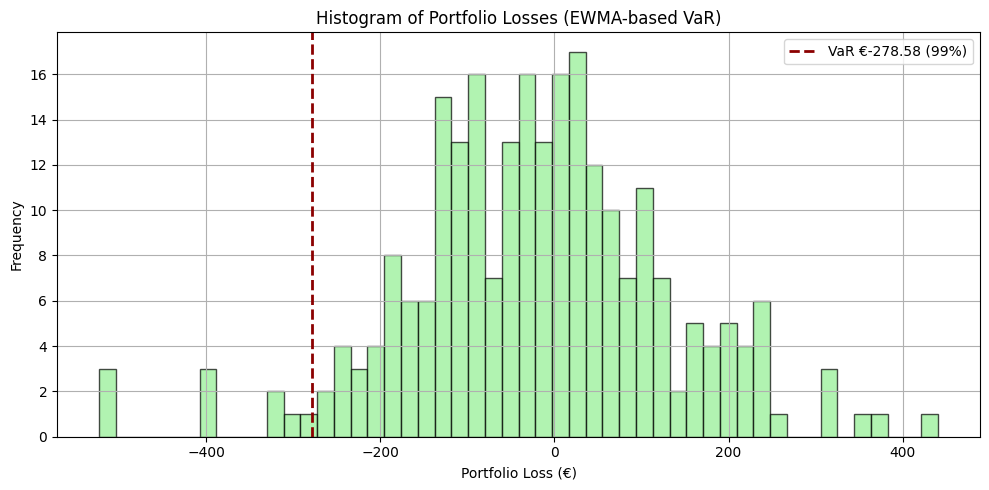

In [ ]:
var_ewma_pct, var_ewma_eur = calculate_ewma_var(
    returns_df['Portfolio_Return'],
    confidence_level=0.99,
    portfolio_value=10000
)

The 1-day 99% Value at Risk indicates that there is only a 5% chance the portfolio will lose more than €278.58, or 2.79% of its value, in a single day under normal market conditions.

**EWMA Weight Decay Structure**

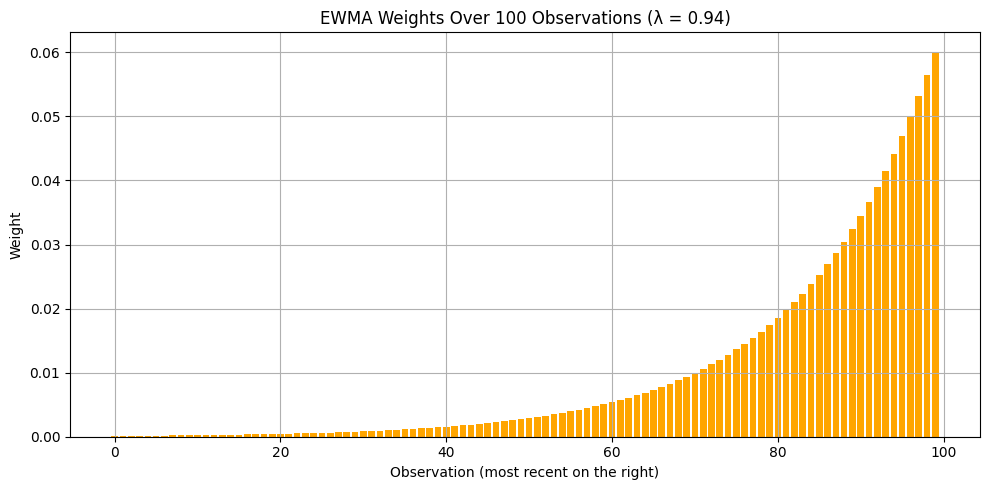

In [ ]:
def plot_ewma_weights(n_obs=100, lambda_=0.94):
    """
    Plot the EWMA weights applied to past observations.

    Parameters:
        n_obs (int): Number of past observations to display.
        lambda_ (float): Decay factor for EWMA.

    Returns:
        None (displays the plot)
    """
    weights = [(1 - lambda_) * (lambda_ ** i) for i in range(n_obs)]
    weights = np.array(weights)
    weights /= weights.sum()  # Normalize to sum to 1

    plt.figure(figsize=(10, 5))
    plt.bar(range(n_obs), weights[::-1], color='orange')
    plt.title(f"EWMA Weights Over {n_obs} Observations (λ = {lambda_})")
    plt.xlabel("Observation (most recent on the right)")
    plt.ylabel("Weight")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_ewma_weights(n_obs=100, lambda_=0.94)

This chart shows how the EWMA method with λ = 0.94 assigns exponentially decreasing weights, giving more importance to recent observations for volatility or risk estimation.

<br>

## Historical Method (Non Parametric approach)

The **historical simulation method** estimates Value at Risk (VaR) based on **real past returns**, without assuming any specific distribution.

It identifies the return at a given confidence level (e.g., the 1th percentile for 99% confidence) and treats it as the worst expected loss.

The formula is:

$$
\text{VaR}_\alpha = -\text{Percentile}_{(1 - \alpha)}(r) \times \text{Portfolio Value}
$$

Where:
- $r$ is the series of historical returns,
- $\alpha$ is the confidence level (e.g., 0.99 for 99% confidence).

This method reflects actual market behavior and


In [ ]:
def calculate_historical_var(returns, confidence_level=0.99, portfolio_value=10000):
    """
    Calculate non-parametric VaR using the historical simulation method.

    Parameters:
        returns (array-like): Daily returns of the asset or portfolio.
        confidence_level (float): Confidence level (e.g., 0.95).
        portfolio_value (float): Value of the portfolio.

    Returns:
        None (prints VaR results and shows plot)
    """
    # Sort returns (ascending: worst to best)
    sorted_returns = np.sort(returns)

    # Calculate the index for the percentile
    percentile_index = int((1 - confidence_level) * len(sorted_returns))
    var_percent = -sorted_returns[percentile_index]  # Negative because it's a loss
    var_value = var_percent * portfolio_value

    # Print results
    print(f"Confidence Level: {confidence_level:.0%}")
    print(f"Portfolio Value: €{portfolio_value:,.2f}")
    print(f"VaR (Historical): -{var_percent:.2%} → €{-var_value:,.2f}")

    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(returns, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.axvline(sorted_returns[percentile_index], color='darkred', linestyle='--', linewidth=2,
                label=f'VaR Threshold ({confidence_level:.0%})')
    plt.title('Histogram of Daily Returns with Historical VaR Threshold')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return var_percent, var_value


Confidence Level: 99%
Portfolio Value: €10,000.00
VaR (Historical): -3.58% → €-358.04


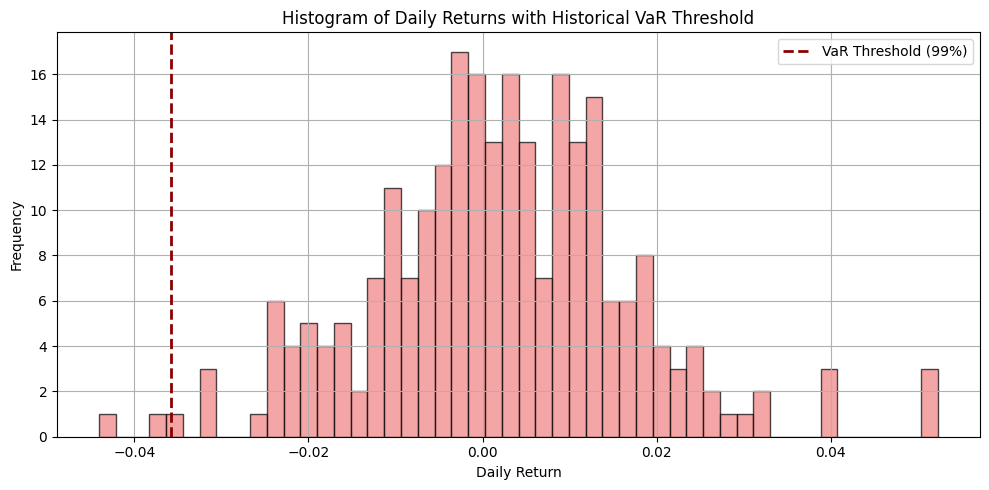

In [ ]:
var_hist_pct, var_hist_eur = calculate_historical_var(
    returns_df['Portfolio_Return'],
    confidence_level=0.99,
    portfolio_value=10000
)

## Hybrid approach

The **hybrid approach** combines elements of both **parametric** (like EWMA weighting) and **non-parametric** (historical simulation) methods. It improves the standard historical simulation by giving **more weight to recent returns** and **less to older ones**, using an **exponential decay factor**.

The weight for each return is calculated as:

$$
w(i) = \frac{\lambda^{i-1}(1 - \lambda)}{1 - \lambda^n}
$$

Where:
- $w(i)$ is the weight assigned to the $i^{th}$ return (ranked from most recent to oldest),
- $\lambda$ is the decay factor,
- $n$ is the total number of return observations.

Once all returns are weighted, the **VaR is found by accumulating weights** from the worst return upward until the cumulative weight reaches the desired confidence level (e.g., 1% for 99% VaR). Interpolation may be used if the exact percentile falls between two returns.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_hybrid_var(returns, confidence_level=0.99, portfolio_value=10000, lambda_=0.94):
    """
    Calculate the hybrid (filtered historical simulation) Value at Risk (VaR)
    using exponentially weighted historical returns, and display a histogram
    of portfolio losses in €.

    Parameters:
        returns (array-like): Daily returns of the portfolio.
        confidence_level (float): Confidence level (e.g., 0.99 for 1% tail risk).
        portfolio_value (float): Current value of the portfolio in €.
        lambda_ (float): Exponential decay factor (e.g., 0.94 for financial applications).

    Returns:
        None (prints results and displays a loss histogram)
    """
    returns = np.array(returns)
    n = len(returns)
    alpha = 1 - confidence_level

    # Step 1: Compute normalized exponential weights (most recent data gets highest weight)
    weights = np.array([lambda_**i for i in range(n)][::-1])
    weights = weights * (1 - lambda_) / (1 - lambda_**n)

    # Step 2: Sort returns and reorder weights accordingly
    sorted_indices = np.argsort(returns)
    sorted_returns = returns[sorted_indices]
    sorted_weights = weights[sorted_indices]

    # Step 3: Compute cumulative weights and identify quantile for VaR
    cum_weights = np.cumsum(sorted_weights)
    idx = np.searchsorted(cum_weights, alpha)

    # Interpolate if necessary to precisely locate the alpha-quantile
    if cum_weights[idx] == alpha or idx == 0:
        var_percent = -sorted_returns[idx]
    else:
        x0, x1 = cum_weights[idx - 1], cum_weights[idx]
        y0, y1 = sorted_returns[idx - 1], sorted_returns[idx]
        var_percent = -(y0 + (alpha - x0) * (y1 - y0) / (x1 - x0))

    var_value = var_percent * portfolio_value
    losses = -returns * portfolio_value  # Convert returns to € losses

    # Print summary results
    print(f"Confidence Level: {confidence_level:.0%}")
    print(f"Portfolio Value: €{portfolio_value:,.2f}")
    print(f"Hybrid Weighted VaR (λ={lambda_}): -{var_percent:.2%} → €{-var_value:,.2f}")

    # Plot histogram of portfolio losses in €
    plt.figure(figsize=(10, 5))
    plt.hist(losses, bins=50, alpha=0.7, color='cornflowerblue', edgecolor='black')
    plt.axvline(-var_value, color='darkred', linestyle='--', linewidth=2,
                label=f'VaR €{-var_value:,.2f} ({confidence_level:.0%})')
    plt.title('Histogram of Portfolio Losses (Hybrid VaR)')
    plt.xlabel('Portfolio Loss (€)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return var_percent, var_value


Confidence Level: 99%
Portfolio Value: €10,000.00
Hybrid Weighted VaR (λ=0.94): -4.07% → €-406.76


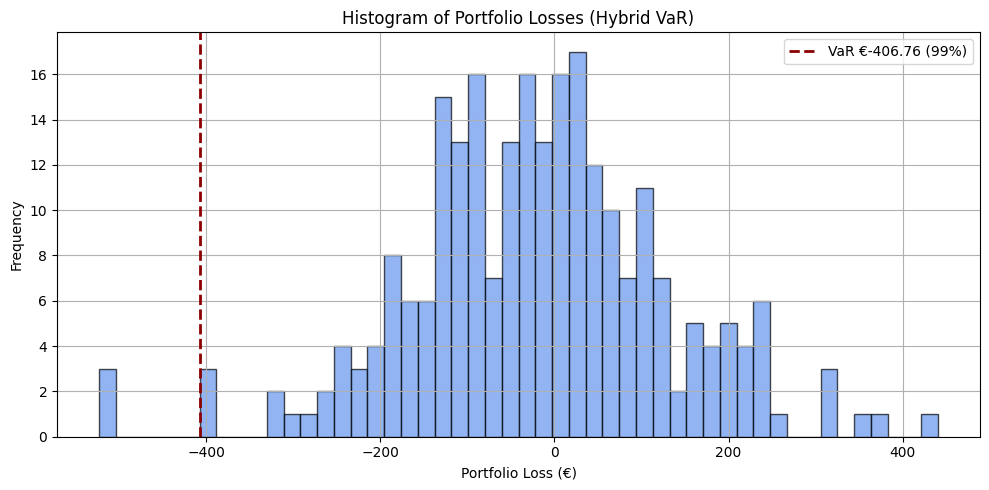

In [ ]:
var_hybrid_pct, var_hybrid_eur = calculate_hybrid_var(
    returns_df['Portfolio_Return'],
    confidence_level=0.99,
    portfolio_value=10000,
    lambda_=0.94
)


With 99% confidence, the expected maximum daily loss is €406.76, or 4.07% of the portfolio value.

<br>

## Monte Carlo Value at Risk (VaR)

Monte Carlo simulation is a method used to generate a large number of possible future return scenarios based on historical data. From these simulated returns, we estimate the potential extreme loss at a given confidence level. This provides an estimate of the **Value at Risk (VaR)**, which represents the maximum likely loss over a specified time horizon with a certain probability.

Two approaches are used here:

- **Parametric approach**: This assumes that returns follow a normal distribution $\mathcal{N}(\mu, \sigma^2)$, where $\mu$ is the historical mean return and $\sigma$ is the standard deviation. Future returns are simulated using this normal distribution.

- **Non-parametric (bootstrap) approach**: This makes no assumption about the distribution of returns. Future returns are simulated by randomly sampling (with replacement) from the historical returns.

In both cases, the VaR is calculated as the $(1 - \alpha)$ quantile of the simulated return distribution, and then converted into monetary loss by multiplying by the portfolio value.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_monte_carlo_var(returns, confidence_level=0.99, portfolio_value=10000, n_simulations=10000):
    """
    Calculate Monte Carlo VaR using both parametric and non-parametric (bootstrap) methods,
    and plot histogram of simulated returns (%), not losses.

    Parameters:
        returns (array-like): Historical daily returns.
        confidence_level (float): Confidence level (e.g., 0.95).
        portfolio_value (float): Value of the portfolio in euros.
        n_simulations (int): Number of simulations.

    Returns:
        simulated_returns_param, simulated_returns_nonparam, var_percent_param, var_percent_nonparam
    """

    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns, ddof=1)

    # --- PARAMETRIC MONTE CARLO ---
    simulated_returns_param = np.random.normal(loc=mean_return,
                                               scale=std_return,
                                               size=n_simulations)
    var_percent_param = np.percentile(simulated_returns_param, (1 - confidence_level) * 100)
    var_value_param = -var_percent_param * portfolio_value

    # --- NON-PARAMETRIC MONTE CARLO (BOOTSTRAP) ---
    simulated_returns_nonparam = np.random.choice(returns, size=n_simulations, replace=True)
    var_percent_nonparam = np.percentile(simulated_returns_nonparam, (1 - confidence_level) * 100)
    var_value_nonparam = -var_percent_nonparam * portfolio_value

    # Print summary
    print(f"Confidence Level: {confidence_level:.0%}")
    print(f"Portfolio Value: €{portfolio_value:,.2f}")
    print(f"Parametric Monte Carlo VaR: {var_percent_param:.2%} → €{var_value_param:.2f}")
    print(f"Non-Parametric Monte Carlo VaR: {var_percent_nonparam:.2%} → €{var_value_nonparam:.2f}")

    return simulated_returns_param, simulated_returns_nonparam, var_percent_param,var_value_param, var_percent_nonparam, var_value_nonparam


In [ ]:
def plot_monte_carlo_returns(simulated_returns, var_percent, confidence_level=0.99, method_name="Parametric"):
    """
    Plot histogram of simulated daily returns (%) with VaR line.

    Parameters:
        simulated_returns (array-like): Simulated returns.
        var_percent (float): Value at Risk (as return).
        confidence_level (float): VaR confidence level.
        method_name (str): Method name for title.
    """
    plt.figure(figsize=(10, 5))
    plt.hist(simulated_returns, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    plt.axvline(var_percent, color='red', linestyle='--', linewidth=2,
                label=f'VaR {confidence_level:.0%}: {var_percent:.2%}')
    plt.title(f'Monte Carlo Simulation ({method_name}) - Simulated Returns')
    plt.xlabel('Daily Return (%)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Parametric**

Confidence Level: 99%
Portfolio Value: €10,000.00
Parametric Monte Carlo VaR: -3.24% → €323.94
Non-Parametric Monte Carlo VaR: -3.58% → €358.04


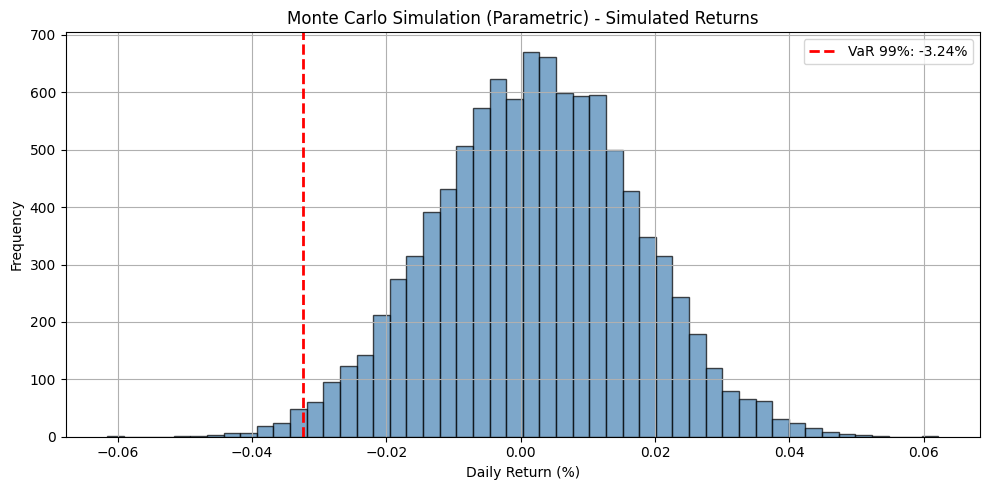

In [ ]:
# === Parametric Monte Carlo ===
simulated_returns_param, _, var_percent_param, var_value_param, _, _ = calculate_monte_carlo_var(
    returns_df['Portfolio_Return'],
    confidence_level=0.99,
    portfolio_value=10000
)

# Plot parametric results
plot_monte_carlo_returns(simulated_returns_param, var_percent_param, confidence_level=0.99, method_name="Parametric")


**No Parametric**

Confidence Level: 99%
Portfolio Value: €10,000.00
Parametric Monte Carlo VaR: -3.20% → €320.24
Non-Parametric Monte Carlo VaR: -3.58% → €358.04


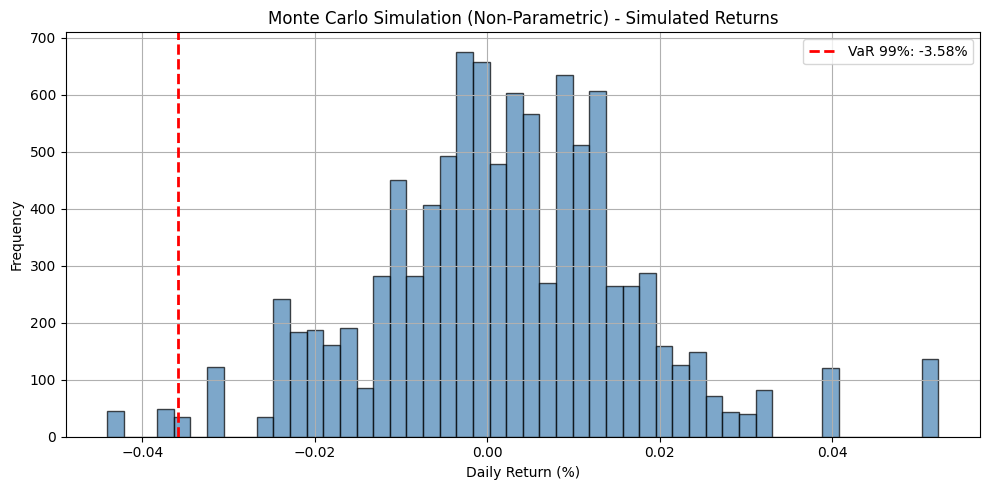

In [ ]:
# === Non-Parametric Monte Carlo ===
_, simulated_returns_nonparam, _, _, var_percent_nonparam, var_value_nonparam = calculate_monte_carlo_var(
    returns_df['Portfolio_Return'],
    confidence_level=0.99,
    portfolio_value=10000
)

# Plot non-parametric results
plot_monte_carlo_returns(simulated_returns_nonparam, var_percent_nonparam, confidence_level=0.99, method_name="Non-Parametric")


#**Comparative Analysis of VaR Approaches**

In this section, we compare the Value at Risk (VaR) estimates obtained using the parametric and non-parametric Monte Carlo methods. We examine the differences between the results, and evaluate the accuracy of each model through statistical backtesting.

To assess the reliability of each VaR model, we apply two standard backtesting procedures: Kupiec Test and Christoffersen Test


##**Summary of results**

In [ ]:
import pandas as pd

# Summary of results (ensure that you are using the correct variables returned by your functions)
results_summary = [
    {"Method": "SMA (Parametric)",          "VaR %": var_parametric_pct,    "VaR €": -var_parametric_eur},
    {"Method": "EWMA (Parametric)",         "VaR %": var_ewma_pct,          "VaR €": -var_ewma_eur},
    {"Method": "Historical Simulation",     "VaR %": var_hist_pct,          "VaR €": -var_hist_eur},
    {"Method": "Hybrid (Filtered Hist.)",   "VaR %": var_hybrid_pct,        "VaR €": -var_hybrid_eur},
    {"Method": "Monte Carlo (Parametric)",  "VaR %": -var_percent_param,     "VaR €": -var_value_param},
    {"Method": "Monte Carlo (Non-Param.)",  "VaR %": var_percent_nonparam,  "VaR €": -var_value_nonparam}
]
# Create the DataFrame
df_summary = pd.DataFrame(results_summary)

# Sort by the largest losses (€) in ascending order
df_summary = df_summary.sort_values(by="VaR €", ascending=True).reset_index(drop=True)

# Formatting: rounding and formatting the numbers
df_summary["VaR %"] = df_summary["VaR %"].apply(lambda x: f"{-x:.2%}")
df_summary["VaR €"] = df_summary["VaR €"].apply(lambda x: f"€{-x:,.2f}")

# Display the final table
print("=== Summary of Value at Risk Methods ===")
display(df_summary)

=== Summary of Value at Risk Methods ===


,Method,VaR %,VaR €
0,Hybrid (Filtered Hist.),-4.07%,€406.76
1,Historical Simulation,-3.58%,€358.04
2,Monte Carlo (Non-Param.),3.58%,€358.04
3,SMA (Parametric),-3.50%,€350.12
4,Monte Carlo (Parametric),-3.24%,€323.94
5,EWMA (Parametric),-2.79%,€278.58


The results show a consistent ranking of the VaR estimates across methods. The EWMA method yields the lowest risk estimate, reflecting lower recent volatility, while the Hybrid approach provides the most conservative estimate due to its emphasis on both recent and extreme losses. The historical and non-parametric Monte Carlo methods yield identical values, as expected, while SMA and parametric Monte Carlo offer intermediate and relatively stable estimates.



##**Backtesting**

To assess the validity of the VaR models, we apply two widely used backtesting techniques. These allow us to verify whether the predicted risk level matches the actual losses observed in the data.

- **Kupiec Test (Unconditional Coverage)**  
  This test checks whether the proportion of VaR violations corresponds to the expected frequency under the chosen confidence level $\alpha$.

  The test statistic is:

  $$
  LR_{\text{uc}} = -2 \ln \left[ (1 - \hat{p})^{n_0} \hat{p}^{n_1} \right] + 2 \ln \left[ (1 - \alpha)^{n_0} \alpha^{n_1} \right]
  $$

  where:
  - $\hat{p} = \frac{n_1}{n}$ is the observed violation rate,
  - $n_1$ is the number of exceptions,
  - $n_0 = n - n_1$ is the number of non-exceptions,
  - $n$ is the total number of observations.

- **Christoffersen Test (Conditional Coverage)**  
  This test evaluates whether exceptions are independent over time. It combines the **Kupiec test** with a test of **exception clustering** using a first-order Markov chain of violation states.

  The Christoffersen test statistic is:

  $$
  LR_{\text{cc}} = LR_{\text{uc}} + LR_{\text{ind}}
  $$

  where $LR_{\text{ind}}$ tests the independence of exceptions.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def kupiec_test(violations, total_obs, confidence_level=0.99):
    """
    Performs the Kupiec test (POF - Proportion of Failures) for VaR

    Args:
        violations: number of observed violations
        total_obs: total number of observations
        confidence_level: confidence level of VaR (e.g., 0.99 for 99% VaR)

    Returns:
        p_value: p-value of the test
        result: "Accepted" if p > 0.06, otherwise "Rejected"
    """
    # Theoretical violation rate
    alpha = 1 - confidence_level

    # Observed violation rate
    observed_rate = violations / total_obs

    # Calculate the likelihood ratio test statistic
    if violations == 0:
        # Avoid numerical issues when there are no violations
        return 0, "Rejected"  # It's suspicious to have no violations

    likelihood_ratio = -2 * (np.log((1 - alpha) ** (total_obs - violations) * alpha ** violations) -
                            np.log((1 - observed_rate) ** (total_obs - violations) * observed_rate ** violations))

    # The statistic follows a Chi-squared distribution with 1 degree of freedom
    p_value = 1 - stats.chi2.cdf(likelihood_ratio, 1)

    # Test decision (threshold of 6%)
    result = "Accepted" if p_value > 0.06 else "Rejected"

    return p_value, result, likelihood_ratio

def christoffersen_independence_test(violations):
    """
    Performs the Christoffersen independence test for VaR violations

    Args:
        violations: binary series of VaR violations (1 for violation, 0 for non-violation)

    Returns:
        p_value: p-value of the independence test
        result: "Accepted" if p > 0.05, otherwise "Rejected"
        likelihood_ratio: the test statistic
    """
    # Count transition pairs
    n00 = n01 = n10 = n11 = 0

    for i in range(len(violations)-1):
        if violations[i] == 0 and violations[i+1] == 0:
            n00 += 1
        elif violations[i] == 0 and violations[i+1] == 1:
            n01 += 1
        elif violations[i] == 1 and violations[i+1] == 0:
            n10 += 1
        elif violations[i] == 1 and violations[i+1] == 1:
            n11 += 1

    # Handle zero counts to avoid division by zero
    if n00 + n01 == 0 or n10 + n11 == 0 or n00 == 0 or n10 == 0:
        return 0, "Insufficient data", 0

    # Probabilities
    p01 = n01 / (n00 + n01)
    p11 = n11 / (n10 + n11)
    p = (n01 + n11) / (n00 + n01 + n10 + n11)

    # Calculate the likelihood ratio
    likelihood_ratio = -2 * (np.log((1-p)**(n00+n10) * p**(n01+n11)) -
                             np.log((1-p01)**n00 * p01**n01 * (1-p11)**n10 * p11**n11))

    # Test against the chi-square distribution with 1 degree of freedom
    p_value = 1 - stats.chi2.cdf(likelihood_ratio, 1)

    # Decision rule
    result = "Accepted" if p_value > 0.05 else "Rejected"

    return p_value, result, likelihood_ratio

def christoffersen_combined_test(violations, total_obs, confidence_level=0.99):
    """
    Performs Christoffersen's combined test (unconditional coverage + independence)

    Args:
        violations: binary series of VaR violations (1 for violation, 0 for non-violation)
        total_obs: total number of observations
        confidence_level: confidence level of VaR (e.g., 0.99 for 99% VaR)

    Returns:
        uc_pvalue: p-value for unconditional coverage test (Kupiec)
        ind_pvalue: p-value for independence test
        cc_pvalue: p-value for combined test
        result: "Accepted" if cc_pvalue > 0.05, otherwise "Rejected"
    """
    # Unconditional coverage test (Kupiec test)
    num_violations = sum(violations)
    alpha = 1 - confidence_level
    observed_rate = num_violations / total_obs

    if num_violations == 0:
        return 0, 0, 0, "Rejected"

    # Calculate Kupiec test
    uc_pvalue, _, uc_stat = kupiec_test(num_violations, total_obs, confidence_level)

    # Independence test
    ind_pvalue, _, ind_stat = christoffersen_independence_test(violations)

    # Combined test (conditional coverage) - sum of the two test statistics
    cc_stat = uc_stat + ind_stat
    cc_pvalue = 1 - stats.chi2.cdf(cc_stat, 2)  # Combined test has 2 degrees of freedom

    # Decision rule
    result = "Accepted" if cc_pvalue > 0.05 else "Rejected"

    return uc_pvalue, ind_pvalue, cc_pvalue, result

# Assuming we have the return series and calculated VaR values
returns = returns_df['Portfolio_Return']

# Retrieve VaR values from your dataframe
var_methods = {
    "SMA (Parametric)": var_parametric_pct,
    "EWMA (Parametric)": var_ewma_pct,  # Added back this method
    "Historical Simulation": var_hist_pct,
    "Hybrid (Filtered Hist.)": var_hybrid_pct,
    "Monte Carlo (Parametric)": -var_percent_param,
    "Monte Carlo (Non-Param.)": -var_percent_nonparam
}

# Backtesting over a period of 250 days
test_period = 250
test_returns = returns[-test_period:]

# Results for each test
christoffersen_results = []
kupiec_results = []

for method, var_value in var_methods.items():
    # Create binary violation series (1 when violation occurs, 0 otherwise)
    violation_series = (test_returns < -var_value).astype(int)
    violations_count = sum(violation_series)
    violation_rate = violations_count / test_period

    # Apply Kupiec test separately
    k_pvalue, k_decision, _ = kupiec_test(violations_count, test_period, confidence_level=0.99)

    # Apply the Christoffersen combined test
    uc_pvalue, ind_pvalue, cc_pvalue, cc_decision = christoffersen_combined_test(
        violation_series, test_period, confidence_level=0.99)

    # Record Kupiec results
    kupiec_results.append({
        "Method": method,
        "VaR Value": f"{var_value:.2%}",
        "Expected Violations": f"{test_period * 0.01:.1f}",
        "Actual Violations": violations_count,
        "Violation Rate": f"{violation_rate:.2%}",
        "P-Value": f"{k_pvalue:.4f}",
        "Test Result": k_decision
    })

    # Record Christoffersen results
    christoffersen_results.append({
        "Method": method,
        "VaR Value": f"{var_value:.2%}",
        "Expected Violations": f"{test_period * 0.01:.1f}",
        "Actual Violations": violations_count,
        "Violation Rate": f"{violation_rate:.2%}",
        "UC P-Value": f"{uc_pvalue:.4f}",
        "Ind P-Value": f"{ind_pvalue:.4f}",
        "CC P-Value": f"{cc_pvalue:.4f}",
        "Test Result": cc_decision
    })

# Create DataFrames
df_kupiec = pd.DataFrame(kupiec_results)
df_christoffersen = pd.DataFrame(christoffersen_results)

# Combine results into one comprehensive DataFrame
combined_results = []
for i, method in enumerate(var_methods.keys()):
    combined_results.append({
        "Method": method,
        "VaR Value": df_kupiec.loc[i, "VaR Value"],
        "Expected Violations": df_kupiec.loc[i, "Expected Violations"],
        "Actual Violations": df_kupiec.loc[i, "Actual Violations"],
        "Kupiec P-Value": df_kupiec.loc[i, "P-Value"],
        "Kupiec Result": df_kupiec.loc[i, "Test Result"],
        "Christoffersen Ind P-Value": df_christoffersen.loc[i, "Ind P-Value"],
        "Christoffersen CC P-Value": df_christoffersen.loc[i, "CC P-Value"],
        "Christoffersen Result": df_christoffersen.loc[i, "Test Result"],
        "Overall Assessment": "Accepted" if (df_kupiec.loc[i, "Test Result"] == "Accepted" and
                                           df_christoffersen.loc[i, "Test Result"] == "Accepted")
                             else "Rejected"
    })

# Final combined DataFrame
df_combined = pd.DataFrame(combined_results)


In [ ]:
# Function to color the entire row based on assessment
def color_rows_by_assessment(row):
    if row["Overall Assessment"] == "Accepted":
        return ['background-color: #c6efce; color: black'] * len(row)  # light green
    else:
        return ['background-color: #ffc7ce; color: black'] * len(row)  # light red

# Apply the style to all rows
styled_df = df_combined.style.apply(color_rows_by_assessment, axis=1)

# Display the styled DataFrame
styled_df

,Method,VaR Value,Expected Violations,Actual Violations,Kupiec P-Value,Kupiec Result,Christoffersen Ind P-Value,Christoffersen CC P-Value,Christoffersen Result,Overall Assessment
0,SMA (Parametric),3.50%,2.5,3,0.7580,Accepted,0.7863,0.9192,Accepted,Accepted
1,EWMA (Parametric),2.79%,2.5,6,0.0594,Rejected,0.6189,0.1494,Accepted,Rejected
2,Historical Simulation,3.58%,2.5,2,0.7419,Accepted,0.8569,0.9319,Accepted,Accepted
3,Hybrid (Filtered Hist.),4.07%,2.5,1,0.2781,Accepted,0.9283,0.5531,Accepted,Accepted
4,Monte Carlo (Parametric),3.24%,2.5,3,0.7580,Accepted,0.7863,0.9192,Accepted,Accepted
5,Monte Carlo (Non-Param.),3.58%,2.5,2,0.7419,Accepted,0.8569,0.9319,Accepted,Accepted


- **All VaR methods pass the backtesting test (except EWMA)**, adhering to the required number of violations. Furthermore, the tests for backtesting (**Kupiec** and **Christoffersen** tests) also indicate no issues.

- However, the **EWMA VaR** fails the backtesting process, with a **total of 6 violations**, which exceeds the expected level for a **99% confidence VaR** over **250 observations**. This places the method in the **“yellow zone”** as defined by regulatory guidelines, indicating a **potential weakness in risk estimation** and the possibility of **supervisory penalties**.

- This result is likely due to the **over-smoothing effect** of the EWMA approach, which can underreact to **recent increases in volatility** and lead to **underestimated risk**.

- If such a model were used for **regulatory capital calculations**, the institution could face **increased capital requirements**, as supervisory authorities like the **ACPR** in France apply a **penalty multiplier** when a model exceeds the allowed number of violations.

> **See Table 1 in the Appendix** for the definition of regulatory backtesting zones and the associated penalty multipliers under the **Basel II-III framework**.

<br>

# VaR Estimation Across Time Horizons

In [ ]:
# Scaling factors based on square-root-of-time rule
portfolio_value=10000
periods = {
    "Daily (Historical)": 1,
    "Weekly (Historical)": np.sqrt(5),
    "Monthly (Historical)": np.sqrt(21),
    "Annual (Historical)": np.sqrt(252)
}

# Store scaled Historical VaR values
historical_var_results = {}

for period, multiplier in periods.items():
    var_percent = var_hist_pct * multiplier
    var_value = var_percent * portfolio_value
    historical_var_results[period] = {
        "VaR %": f"{var_percent:.2%}",
        "VaR €": f"€{var_value:,.2f}"
    }

# Create a DataFrame for display
historical_var_df = pd.DataFrame.from_dict(historical_var_results, orient="index")

# Display the result
display(historical_var_df)

,VaR %,VaR €
Daily (Historical),3.58%,€358.04
Weekly (Historical),8.01%,€800.60
Monthly (Historical),16.41%,"€1,640.74"
Annual (Historical),56.84%,"€5,683.70"


- The scaling of VaR using the square-root-of-time rule results in increasing risk estimates across longer horizons, as seen by the progression from 3.58% daily to 56.84% annually.
- However, this assumes independent and identically distributed (i.i.d.) returns, which may not hold in real-world market conditions—particularly during stress periods, where tail dependencies and volatility clustering can affect risk aggregation. This is precisely why regulators and practitioners also compute a **Stressed VaR**.

<br>

# Stressed VaR

Stressed VaR is a risk measure that estimates potential losses in a portfolio during periods of extreme market stress, based on historical or hypothetical crisis scenarios.
It is used to evaluate how a portfolio would perform under abnormal market conditions, such as financial crises.

In our analysis, we selected the period from **September 2008 to September 2009**, as it corresponds to the **global financial crisis**, during which **returns were among the lowest observed**, making it an ideal candidate for **Stressed VaR estimation**.


In [ ]:
# Download historical data for the crisis period (2008-2009)
MSF_crisis = yf.download("MSFT", start="2008-09-01", end="2009-09-01")
CNR_crisis = yf.download("CNR.TO", start="2008-09-01", end="2009-09-01")

# Compute daily log returns for both assets
MSF_crisis['Log_Return_MSF'] = np.log(MSF_crisis['Close'] / MSF_crisis['Close'].shift(1))
CNR_crisis['Log_Return_CNR'] = np.log(CNR_crisis['Close'] / CNR_crisis['Close'].shift(1))

# Merge the two log return series into one DataFrame
returns_crisis = pd.DataFrame({
    'Log_Return_MSF': MSF_crisis['Log_Return_MSF'],
    'Log_Return_CNR': CNR_crisis['Log_Return_CNR']
}).dropna()


# Compute portfolio returns using fixed weights
returns_crisis['Portfolio_Return'] = returns_crisis['Log_Return_MSF'] * w_msf + returns_crisis['Log_Return_CNR'] * w_cnr

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Stressed VaR during the 2008 Financial Crisis**

Confidence Level: 99%
Portfolio Value: €10,000.00
VaR (Historical): -8.29% → €-828.52


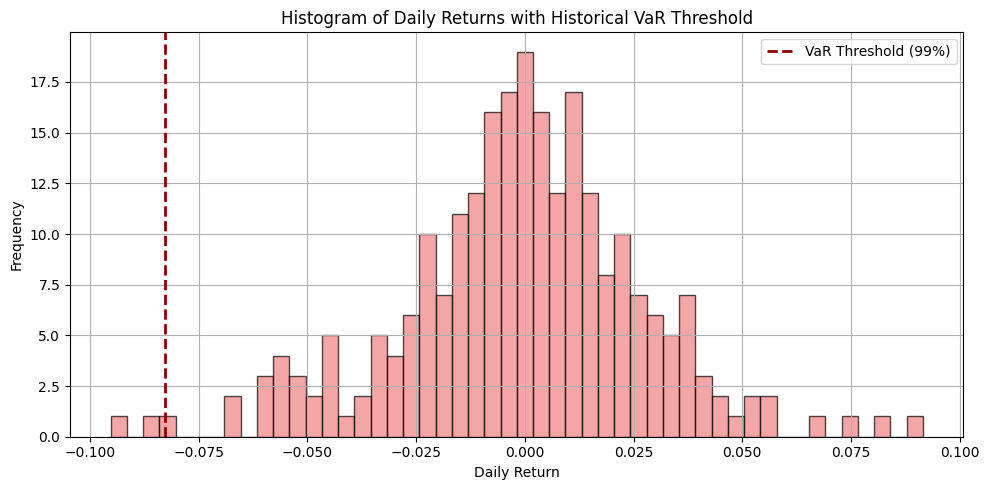

In [ ]:
var_stressed_pct, var_stressed_eur = calculate_historical_var(
    returns_crisis['Portfolio_Return'],
    confidence_level=0.99,
    portfolio_value=10000
)

In [ ]:
import pandas as pd

# Comparaison des deux VaR historiques
historical_var_comparison = pd.DataFrame({
    "Scenario": ["Normal Period", "Crisis Period"],
    "VaR %": [f"{var_hist_pct:.2%}", f"{var_stressed_pct:.2%}"],
    "VaR €": [f"€{var_hist_eur:,.2f}", f"€{var_stressed_eur:,.2f}"]
})

# Affichage du tableau
print("=== Historical VaR Comparison ===")
display(historical_var_comparison)


=== Historical VaR Comparison ===


,Scenario,VaR %,VaR €
0,Normal Period,3.58%,€358.04
1,Crisis Period,8.29%,€828.52


**VaR Comparison: Normal vs. Crisis Period**

The **stressed VaR** reaches **€828.52**, compared to **€358.04** in normal market conditions — **more than twice the normal VaR**.  
This sharp increase highlights the **amplification of downside risk** and the **elevated exposure to extreme losses** during **financial crises**.  
It clearly underscores the need for **stress testing** as a critical component of **robust portfolio risk management**, ensuring that investors are not blindsided by severe

<br>

# Options - VaR (Project 1)

The Monte Carlo method estimates the Value at Risk (VaR) of an option by simulating future stock prices and applying a Taylor series expansion (Delta-Gamma approximation) to estimate the option's profit and loss (PnL).  
The 1% VaR is then the first percentile of the simulated PnLs.

$$
\Delta V_t = \Delta \cdot \Delta S_t + \frac{1}{2} \Gamma \cdot (\Delta S_t)^2 + \nu \cdot \Delta \sigma_t
$$

Where:  
- $\Delta V_t$ = change in the option’s value (i.e., the PnL)  
- $\Delta S_t$ = change in the underlying stock price  
- $\Delta$, $\Gamma$, $\nu$ = Delta, Gamma, and Vega of the option  
- $\Delta \sigma_t$ = change in implied volatility  

**Calculating Option VaR**

For the computation of the Value at Risk (VaR) of the option, we reuse the parameters and results from **Project 1**, which focused on a European call option on **Puig** stock.  


In [ ]:
import numpy as np

def monte_carlo_call_option(S, K, r, sigma, T, num_simulations=11000, num_steps=63, seed=None):
    """
    Monte Carlo simulation for European call option pricing using GBM under risk-neutral framework.
    """
    if seed is not None:
        np.random.seed(seed)

    dt = T / num_steps
    final_prices = np.zeros(num_simulations)

    for i in range(num_simulations):
        Z = np.random.normal(0, 1, num_steps)
        S_curr = S
        for t in range(num_steps):
            S_curr *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t])
        final_prices[i] = S_curr

    return final_prices


# === Project 1 - Option on Puig Stock ===
S = 17.59  # Current stock price of Puig
K = 18.14  # Strike price of the option
r = 0.0248  # Risk-free rate (2.48%)
sigma = 0.3626  # Implied volatility of the call option (36.26%)
T = 0.25  # Time to maturity (1/4 year)

# Given initial call option price (no need to recalculate)
initial_call_price = 0.829230464724616  # Provided initial call price
# Round the initial call price to 2 decimal places
initial_call_price_rounded = round(initial_call_price, 2)

# Simulate stock prices using Monte Carlo
num_simulations = 11000
simulated_prices = monte_carlo_call_option(S, K, r, sigma, T, num_simulations=num_simulations, seed=42)

# Greeks specific to Project 1 (Option on Puig stock)
delta = 0.461438  # Estimated Delta of the option
gamma = 0.154892  # Estimated Gamma of the option

# Step 3: Apply Taylor series approximation to estimate the option price change (PnL)
delta_S = simulated_prices - S  # Change in stock prices
change_in_option_price = delta * delta_S + 0.5 * gamma * delta_S**2  # Apply Taylor series

# Step 4: Calculate the PnL (profits and losses) for the option relative to the initial call price
losses_or_gains = change_in_option_price

# Step 5: Estimate VaR at 1% (1st percentile of the simulated PnL values)
VaR_1_percent = np.percentile(losses_or_gains, 1)

# Display results
print(f"Given Call Option Price: €{initial_call_price_rounded}")
print(f"Estimated PnL for each simulation: {losses_or_gains[:10]}")  # Display first 10 PnL values
print(f"Estimated VaR at 1% for the Option on Puig stock: €{VaR_1_percent}")

Given Call Option Price: €0.83
Estimated PnL for each simulation: [-0.59634075  0.92124369  0.34264077  0.80123144  0.91986236  1.14608305
  0.67928865 -0.66608237 -0.47564687  3.04576034]
Estimated VaR at 1% for the Option on Puig stock: €-0.6871639975720282


In [ ]:
# === Input values ===
initial_call_price = 0.829230464724616  # Initial market price of the option
VaR_1_percent = VaR_1_percent     # Estimated 1% Value at Risk from Monte Carlo simulation

# === Calculate percentage drop relative to initial option price ===
var_pct = abs(VaR_1_percent) / initial_call_price * 100

# === Output interpretation ===
print(f"The maximum expected loss in the worst 1% of scenarios is €{abs(VaR_1_percent):.2f} per option,")
print(f"which represents a drop of approximately {var_pct:.1f}% from the initial option price of €{initial_call_price:.2f}.")


The maximum expected loss in the worst 1% of scenarios is €0.69 per option,
which represents a drop of approximately 82.9% from the initial option price of €0.83.


<br>

# Expected Shortfall

**CVaR** (or **Expected Shortfall**) measures the **average loss** in the worst-case scenarios — that is, beyond the Value at Risk (VaR) threshold.

- While **VaR** indicates the **minimum loss** at a given confidence level,  
- **CVaR** provides the **expected average loss** once the VaR is breached.

This makes CVaR a more robust measure of **tail risk**, especially relevant during **financial stress**.

---

###General formula:

$$
\text{CVaR}_\alpha = \frac{1}{\alpha} \int_{\text{VaR}}^{-\infty} x \cdot f(x) \, dx
$$

Where:
- $\alpha$ = confidence level (e.g., 99%)
- $f(x)$ = probability density function of returns
- VaR = threshold loss value at level $\alpha$

---

### Parametric CVaR (Normal Distribution)

Under the assumption of normally distributed returns:

$$
\text{CVaR}_{\text{param}} = \mu + \sigma \cdot \frac{e^{-z^2 / 2}}{\alpha \sqrt{2\pi}}
$$

- $\mu$ = mean return (often assumed to be 0)  
- $\sigma$ = standard deviation (volatility)  
- $z$ = quantile of the standard normal distribution (e.g., ≈ 2.33 for 99%)  
- $\alpha$ = confidence level

---

### Historical CVaR (Non-parametric)

This version uses empirical return data (non-parametric):

$$
\text{CVaR}_{\text{historical}} = \frac{1}{\alpha} \sum_{x \leq \text{VaR}} x
$$

It corresponds to the **average of all losses** beyond the historical VaR threshold, and captures **real tail behavior** without distributional assumptions.



<br>

**Calcul of the Parametric and No Parametric CVaR**

In [ ]:
from scipy.stats import norm
import numpy as np

def calculate_parametric_cvar(returns, confidence_level=0.99, portfolio_value=10000):
    """
    CVaR estimation using the Delta-Normal (parametric) method.
    σ is estimated from the returns.
    """
    alpha = 1 - confidence_level
    sigma = returns.std()
    mu = 0  # Common assumption for short-term horizon
    z = norm.ppf(alpha)

    # Parametric CVaR formula (Delta-Normal)
    cvar = mu + sigma * (np.exp(-z**2 / 2) / (alpha * np.sqrt(2 * np.pi)))

    cvar_percent = -cvar * 100
    cvar_euro = -cvar * portfolio_value

    print(f"Parametric CVaR ({int(confidence_level*100)}%): {cvar_percent:.2f}% → €{cvar_euro:.2f}")
    return cvar, cvar_euro


def calculate_historical_cvar(returns, confidence_level=0.99, portfolio_value=10000):
    """
    CVaR estimation using Historical Simulation (non-parametric).
    """
    alpha = 1 - confidence_level
    returns_sorted = np.sort(returns)
    index_var = int(len(returns_sorted) * alpha)

    # Take the worst losses (below the VaR)
    worst_losses = returns_sorted[:index_var]
    cvar = np.mean(worst_losses)

    cvar_percent = cvar * 100
    cvar_euro = cvar * portfolio_value

    print(f"Historical CVaR ({int(confidence_level*100)}%): {cvar_percent:.2f}% → €{cvar_euro:.2f}")
    return cvar, cvar_euro

In [ ]:
# CVaR 1%
calculate_parametric_cvar(returns_df['Portfolio_Return'], confidence_level=0.99, portfolio_value=10000)
calculate_historical_cvar(returns_df['Portfolio_Return'], confidence_level=0.99, portfolio_value=10000)

Parametric CVaR (99%): -4.01% → €-401.12
Historical CVaR (99%): -4.03% → €-402.87


(np.float64(-0.0402870755370712), np.float64(-402.870755370712))

**Comparaison and interpretation CVaR 99%**

- The **Parametric CVaR** is **€401.12** and the **Historical CVaR** is **€402.87**.  
  Both values are larger than the VaR (99%), as CVaR measures the **average loss beyond the VaR threshold**, reflecting **tail risk**.

<br>

# **Exigence of Capitals**

Before, under the **Basel II/III** accords, the **capital requirement** was calculated using the **99% VaR** over a **10-day horizon**, multiplied by a factor of **3**. Since the **FRTB (Fundamental Review of the Trading Book)**, the method has evolved, and now the **97.5% CVaR** is used to calculate the **capital requirement**, accounting for the average losses in the worst-case scenarios.

In [ ]:
calculate_historical_cvar(returns_df['Portfolio_Return'], confidence_level=0.975, portfolio_value=10000)

Historical CVaR (97%): -3.50% → €-350.16


(np.float64(-0.03501626877347317), np.float64(-350.1626877347317))

In [ ]:
# CVaR 2,5%
cvar_hist_pct, cvar_hist_eur = calculate_historical_cvar(
    returns_df['Portfolio_Return'], confidence_level=0.975, portfolio_value=10000
)

Historical CVaR (97%): -3.50% → €-350.16


In [ ]:
# Horizon scaling
scaling = np.sqrt(10)

# Capital calculations
capital_var = var_hist_eur * scaling * 3.0
capital_cvar = -cvar_hist_eur * scaling * 3

# Create comparison table
var_cvar_comparison = pd.DataFrame({
    "Measure": ["VaR 99%", "CVaR 97.5%"],
    "Loss (%)": [f"{var_hist_pct:.2%}", f"{-cvar_hist_pct:.2%}"],
    "Loss (€)": [f"€{var_hist_eur:,.2f}", f"€{-cvar_hist_eur:,.2f}"],
    "Capital Requirement": [f"€{capital_var:,.2f}", f"€{capital_cvar:,.2f}"]
})

# Display
display(var_cvar_comparison)

,Measure,Loss (%),Loss (€),Capital Requirement
0,VaR 99%,3.58%,€358.04,"€3,396.66"
1,CVaR 97.5%,3.50%,€350.16,"€3,321.93"


- The table shows that for a **portfolio of €1,000**, the **VaR 99%** implies a potential loss of **€358.04**, requiring a **capital buffer of €3,396.66** to cover the 99% worst-case scenario. On the other hand, the **CVaR 97.5%** implies a potential loss of **€350.16**, with a **capital requirement of €3,321.93** to cover the average loss in the worst 2.5% of cases.
  
- The difference in the capital requirements reflects the distinct nature of **VaR** and **CVaR**. The **CVaR 97.5%** is slightly lower here, which could be attributed to the **diversification** of the portfolio that helps mitigate tail risk.

- However, it is crucial to note that the capital requirements based on **VaR** or **CVaR** need to be **adjusted frequently** to ensure they remain in line with changing market conditions. **Market volatility**, **portfolio composition**, and other external factors should be continuously monitored and recalibrated to accurately reflect the evolving risk environment.


<br>

# Conclusion

This project estimated the VaR and CVaR of a portfolio composed of MSFT and CNR using several approaches, including parametric, historical, hybrid, and Monte Carlo methods. Backtesting confirmed the reliability of most models, though EWMA showed excessive violations. We also computed a Stressed VaR using crisis-period data, which gave significantly different results from the regular VaR.

While we used a static one-year window, risk evolves over time. A rolling window approach would provide a clearer view of how VaR and CVaR change in different market regimes. Finally, advanced models like GARCH or copulas could further improve tail-risk modeling and dependence structure representation.


<br>

# Annexe

<p align="center"><b>Table 1: Capital Requirement and Penalty under VaR 99% (Pre-CVaR)</b></p>


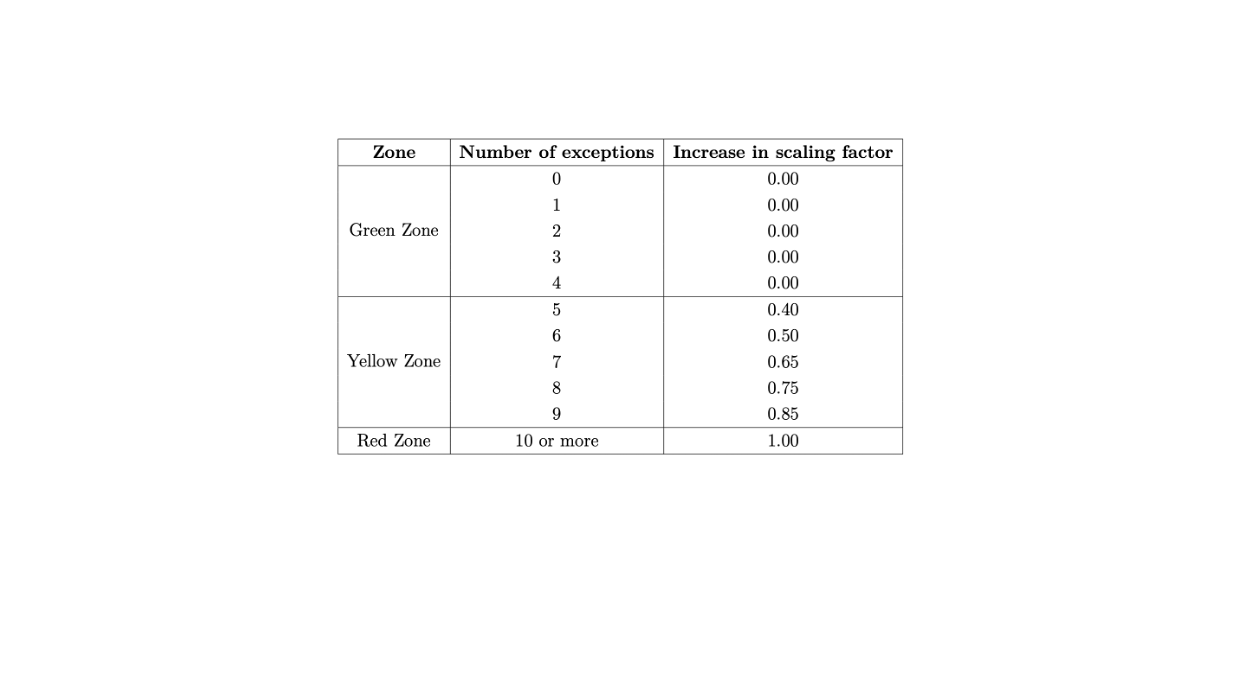

# Bibliography

- Alexander, C. (2008). Market Risk Analysis, Volume I: Quantitative Methods in Finance. Wiley.
- Alexander, C. & Sarabia, J. M. (2011). Value-at-Risk Model Risk. Available at SSRN 1758548.
-  Glasserman, P. (2004). Monte Carlo methods in financial engineering (Vol. 53, pp. xiv+-596). New York: springer
-  Hassani, S. S. & Dionne, G. (2021). Nouvelle réglementation internationale du risque de marché: rôles de la VaR et de la CVaR dans la validation des modèles. Assurances et gestion des risques, 87(3), 169-207.

- Petrov, D. (2025). Risk Management [Course notes].

